In [194]:
from datascience import *
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import csv
import zipfile
from pathlib import Path
import re
from IPython.display import HTML

# import the widgets module
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

sns.set(style="whitegrid")

In [195]:
data = pd.read_csv('cleanedData.csv', dtype={'age': int})

# Partitioning the data into two, one for 2007 and another for 2017
seven = data[data['year'] == 2007]
seventeen = data[data['year'] == 2017]

## A) Wages by industry and occupation

### Changes in Occupation

Lets take a look at the top 5 occupations for each year. 

In [268]:
#This cell reads our data into the notebook. Just run it.

occupation_seven = pd.read_csv('occupation_sample_seven.csv')
occupation_seventeen = pd.read_csv('occupation_sample_seventeen.csv')
occupation = pd.concat([occupation_seven, occupation_seventeen])

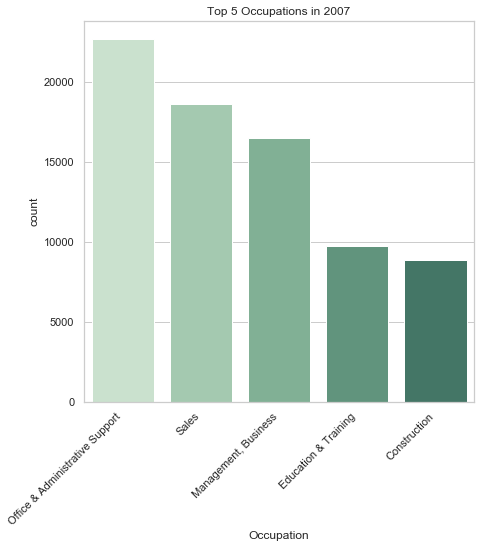

In [269]:
plt.figure(figsize=(7, 7))
p = sns.countplot(data=occupation_seven,
                  x = 'Occupation',
                  order=occupation_seven['Occupation'].value_counts(sort=True).index[0:5],
                 palette = sns.color_palette("ch:2.5,-.2,dark=.3"))
p.set_xticklabels(p.get_xticklabels(), rotation=45, ha='right')
p.set_title('Top 5 Occupations in 2007');
p.set_xlabel('Occupation');

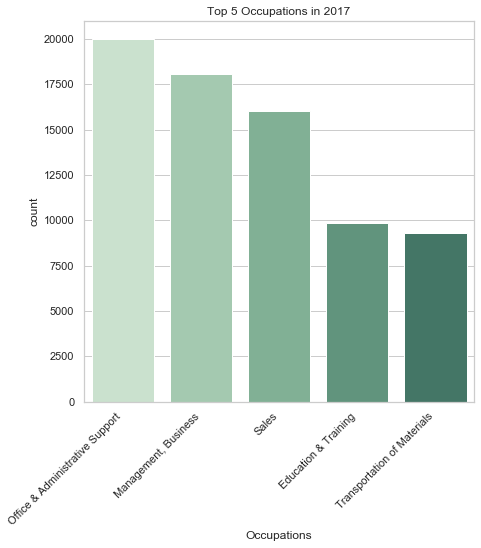

In [203]:
plt.figure(figsize=(7, 7))
ax = sns.countplot(data=occupation_seventeen,
                  x = 'Occupation',
                   order=occupation_seventeen['Occupation'].value_counts(sort=True).index[0:5], 
                  palette = sns.color_palette("ch:2.5,-.2,dark=.3"))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Top 5 Occupations in 2017');
ax.set_xlabel('Occupations');

<div class="alert alert-success">
<b> What changes do you see in the top 5 occupation from 2007 to 2017? If there are changes, what are the differences between 2007 and 2017? </b> 
</div>

##### Your answer here

Let's visualize the top 5 occupations for both years side by side.

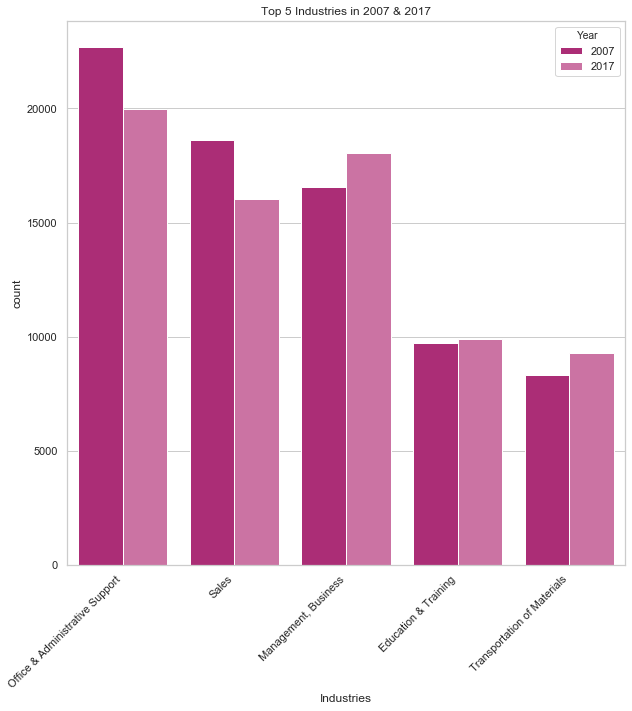

In [216]:
plt.figure(figsize=(10,10));
p = sns.countplot(data=occupation,
                  x = 'Occupation',
                  hue = 'Year', order=occupation['Occupation'].value_counts(sort=True).index[0:5], 
                 palette = sns.color_palette("PiYG", 10))
p.set_xticklabels(p.get_xticklabels(), rotation=45, ha="right")
p.set_title('Top 5 Industries in 2007 & 2017');
p.set_xlabel('Industries');

<div class="alert alert-success">
<b> Does this graph help visualize the changes in top 5 industries in a better way? If so, how? </b> 
</div>

##### Your answer here

### Top 5 Occupations by County

Run the cell below. You should see a drop-down menu that allows youo to select one of the counties that our dataset contains. If you are an LA native, pick your county and analyze what the top 5 occupations were in 2007 and 2017. 

In [230]:
def plot_occupations(county):
    plt.figure(figsize=(10,10));
    county_top_5 = occupation[occupation['County'] == county]
    p = sns.countplot(data=county_top_5,
                  x = 'Occupation',
                  hue = 'Year', order=county_top_5['Occupation'].value_counts(sort=True).index[0:5], 
                     palette = sns.color_palette("deep", 10))
    p.set_xticklabels(p.get_xticklabels(), rotation=45, ha='right')
    p.set_title('Top 5 Occupations in 2007 & 2017 in ' + str(county));
    p.set_xlabel('Occupations');
    
county_widget = widgets.Dropdown(
    options=list(occupation['County'].value_counts().index),
    value=list(occupation['County'].value_counts().index)[0],
    description='Select County:',
    disabled=False,
)

interact(plot_occupations, county=county_widget);

interactive(children=(Dropdown(description='Select County:', options=('Los Angeles-Long Beach-Anaheim, CA', 'S…

<div class="alert alert-success">
<b> What difference, if any, do you see in the top 5 occupations in both years between our entire dataset and your county/the county you selected? How does this reflect the history of the county ? </b> 
</div>

##### Your answer here.

### Top 5 Occupations for Those in Poverty

What are the top 5 occupations for people in poverty? Run the cell below, it should output the top 5 industries for those in poverty.

In [265]:
j = 1
for i in occupation[occupation['Poverty Status'] == 'Poverty']['Occupation'].value_counts(sort=True).index[0:5]:
    print(j, 'Top Occupation:', i)
    j +=1

1 Top Occupation: Sales
2 Top Occupation: Office & Administrative Support
3 Top Occupation: Food Preparation
4 Top Occupation: Personal Care & Service
5 Top Occupation: Building & Grounds Cleaning


<div class="alert alert-success">
<b> What are the top 5 occupations for members in poverty? </b> 
</div>

##### Your answer here.

The graph below maps out the average hours worked per week for each industry. Look for the 5 industries we found above.

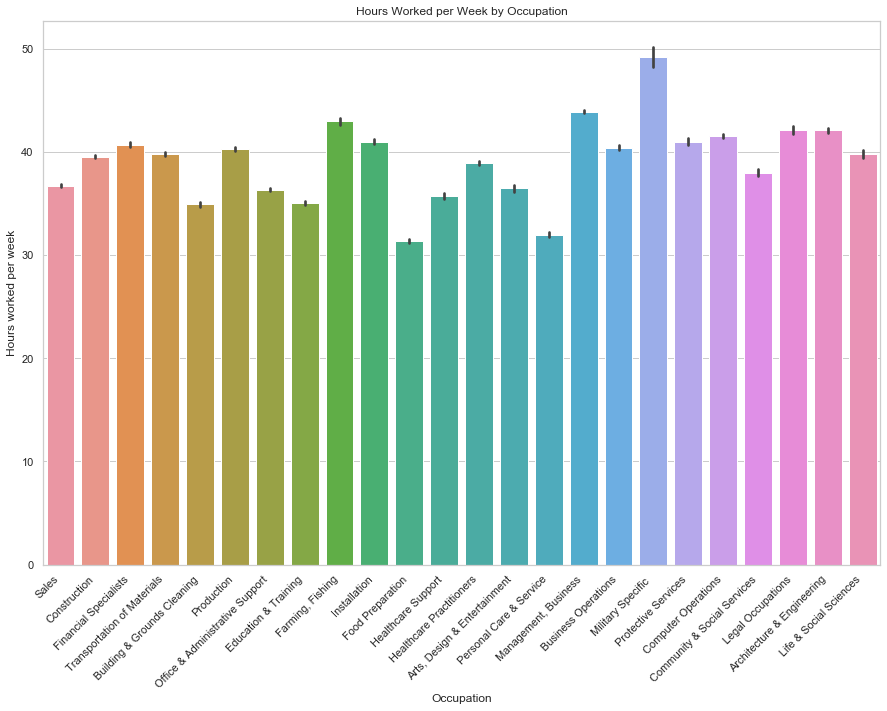

In [267]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='Occupation', y='Hours worked per week', data=education)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
plt.title('Hours Worked per Week by Occupation');

<div class="alert alert-success">
<b> What do you notice in terms of hours worked per week for the top 5 industries for those in poverty? Are thse findings surprising? How does the graph above help explain why certain members in certain occupations are in poverty? </b> 
</div>

##### Your answer here. 

# B) Median income

# C) Education Level

Simply run the cell below to load the education datasets.

In [241]:
education_seven = pd.read_csv('education_seven.csv', dtype={'Hours worked per week': int})
education_seventeen = pd.read_csv('education_seventeen.csv', dtype={'Hours worked per week': int})
education = pd.concat([education_seven, education_seventeen])

### Education and Income
The graph below maps out the total income received based on education level. The education levels can be seen in the x-axis, while the y-axis represents the total income. 

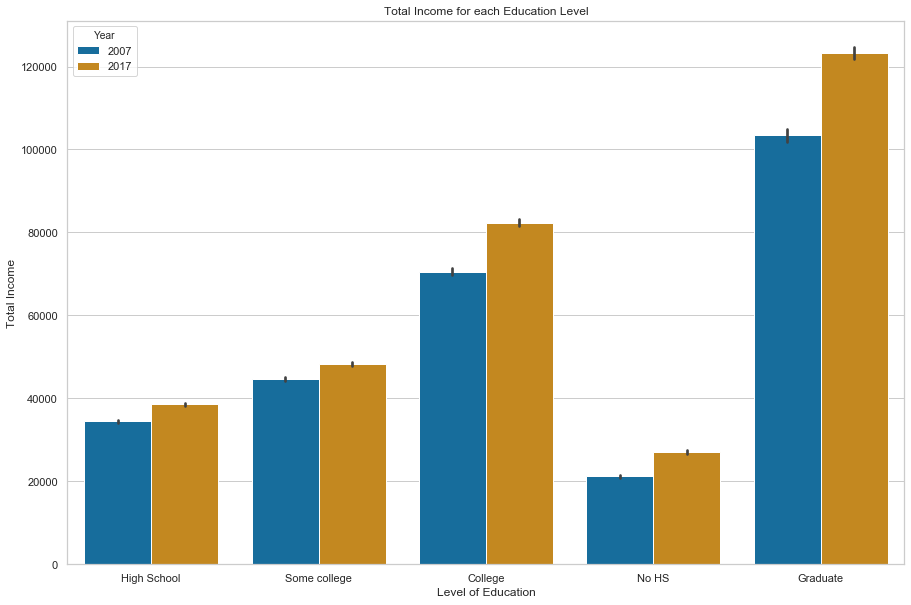

In [232]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='Education Status', y='Personal Pre-Tax Income', 
                 hue='Year', data=education, 
                palette = sns.color_palette("colorblind", 10))
ax.set_xlabel('Level of Education')
ax.set_ylabel('Total Income')
ax.set_title('Total Income for each Education Level');

<div class="alert alert-success">
<b> Living wage is defined as the wage that a worker needs to fulfill their basic needs. This is not to be confused with minimum wage, which is the minimum an employer can pay its employees. According to livingwage.mit.edu, the living wage in America on 2017 was about $16.07/hour. For a regular 40 hour week, that means having an income of about 35K. 

According to this dataset, what level of education ensures a livable income?  </b> 
</div>

##### Your answer here

### Types of Workers

Our dataset also tells us whether a person was self-employed or working for wages under an employer. Let's try to to find out what the average level of education is within self-employed workers.

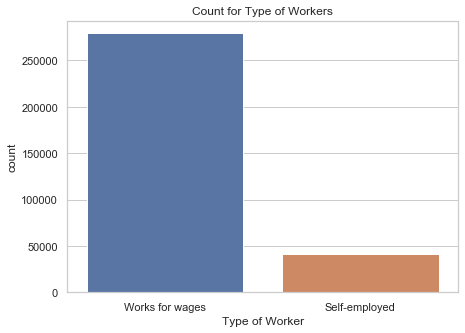

In [207]:
plt.figure(figsize=(7, 5))
sns.countplot(education['Type of Worker']);
plt.title('Count for Type of Workers');

This countplot visualizes the amount of workers who are employed and the amount of workers who are self-employed in our dataset. We can see that there is significantly less self-employed workers. Now let's analyze what their education level is. 

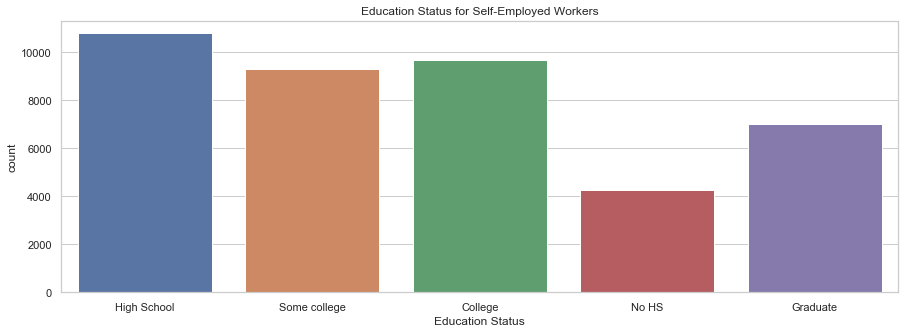

In [209]:
plt.figure(figsize=(15, 5))
sns.countplot(education[education['Type of Worker'] == 'Self-employed']['Education Status']);
plt.title('Education Status for Self-Employed Workers');

<div class="alert alert-success">
<b>What does this graph tell us about the  level of education in self-employed workers? Are you surprised by the results? How did these data disprove what you believed was the truth? If this was a result you were expecting, how do these data back up your beliefs?</b>
    </div>

##### Your answer here.

The following graphs are called violin plots. They help us visualize the distribution for a given category. Read more here "https://mode.com/blog/violin-plot-examples" if you are interested in learning more about violin plots. For now, we will use violin plots in order to help us visualize the distribution in personal income based on education level for self-employed and employed workers.

<img src="https://images.ctfassets.net/fi0zmnwlsnja/sdfgtcRp16wTNOcRceGQm/5bfcb73d2261d49ff20dd7857e0152b1/Screen_Shot_2019-03-01_at_11.36.10_AM.png" style="width:300px;height:300px;"/>

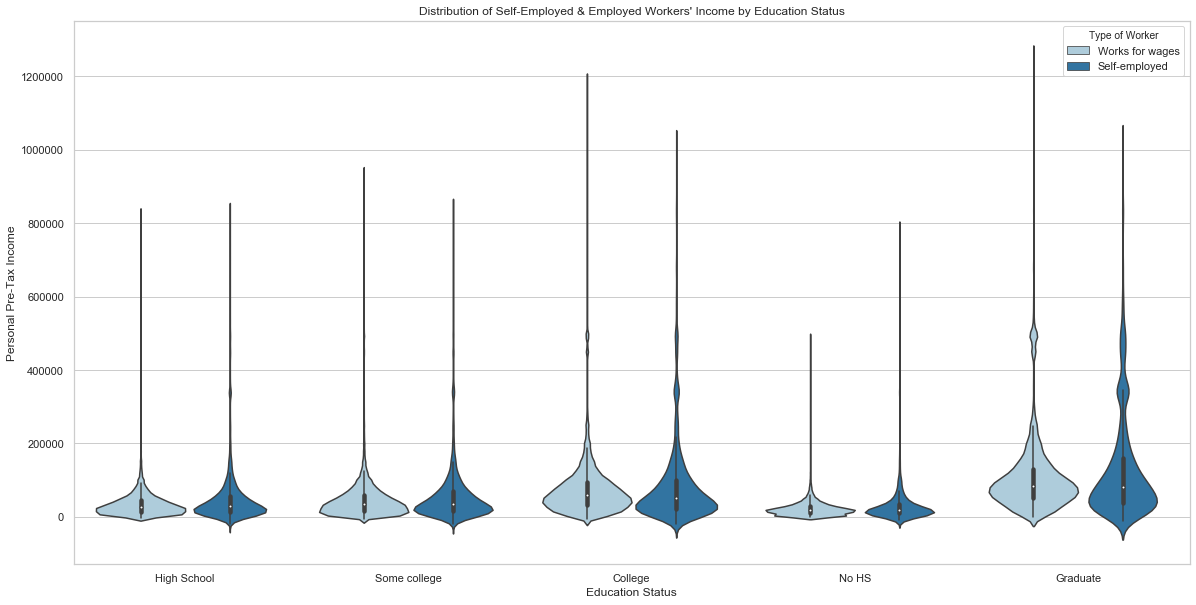

In [210]:
plt.figure(figsize=(20, 10))
sns.violinplot(x='Education Status', y='Personal Pre-Tax Income', 
              data=education, hue='Type of Worker', palette=sns.color_palette("Paired"))
plt.title("Distribution of Self-Employed & Employed Workers' Income by Education Status");

The long tail in our violin plots mean that there are some people whose income reached those values. For example, for those self-employed workers who completed college, we can see that the tail of our violin plot reaches above 100,000. This means that there are some self-employed workers who completed college and are at or above an income of 100K. However, since this violin plot has most of its mass within the 0-20k income range, this scenario is not very likely, as the distribution of income is mostly found within the 0-20K range. 


<div class="alert alert-success">
<b>The graph above helps us see that it does not matter so much whether one is self-employed or employed, but that education level matters much more. How can we reach this conclusion based off the graph?</b>
    </div>

##### Your answer here.

### Race

How are race and education level related?  

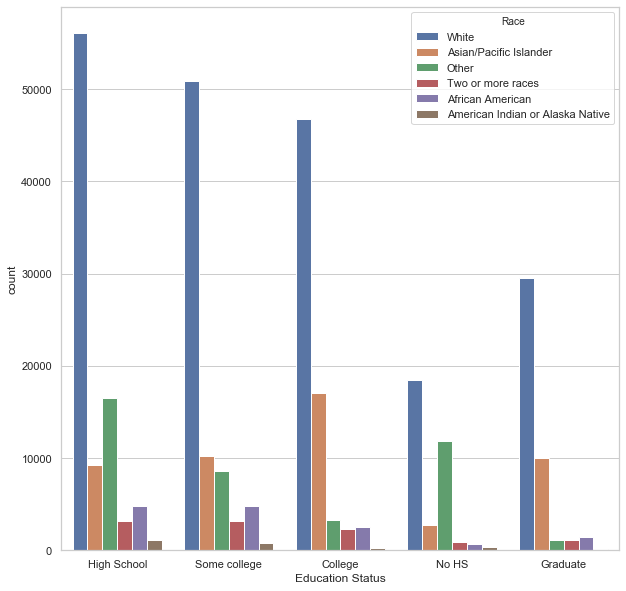

In [145]:
plt.figure(figsize=(10, 10))
sns.countplot(x='Education Status', hue='Race', data=education);

<Figure size 720x1080 with 0 Axes>

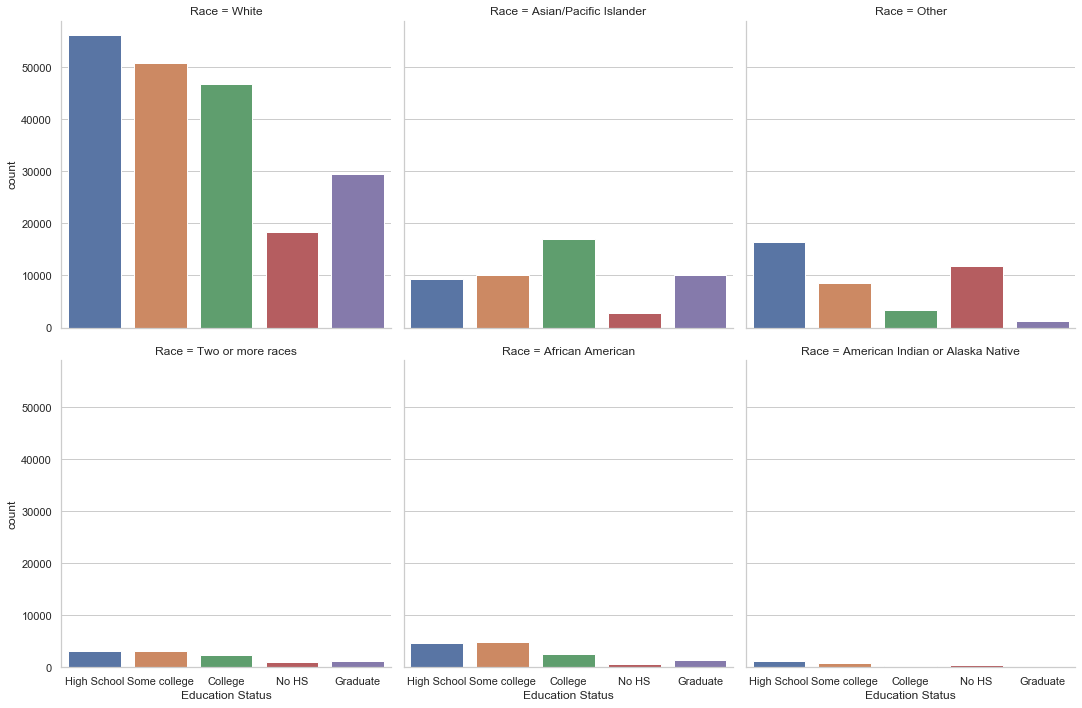

In [171]:
#pd.pivot_table(data=education, index=['Race', 'Education Status'], values=['Personal Pre-Tax Income'], aggfunc=np.mean)

plt.figure(figsize=(10, 15));
ax = sns.catplot(x='Education Status', col='Race', 
            data=education, kind='count', col_wrap=3, orient="h");

In [ ]:
plt.figure(figsize=(15, 10))
educ_corr = pd.get_dummies(education[['Race', 'Education Status']], prefix='')
sns.heatmap(educ_corr.corr(), annot=True, cmap='coolwarm');

<div class="alert alert-success">
<b> What do these visualizations tell you about the level of education that each race receives? Our dataset clearly has more White-identifying individuals so it helps to think about each bar in our bar graph as a proportion for that race. Thus, for Asian/Pacific Islanders, there is higher proportion of people who finish college than there is high school dropouts, but for those whose race is "Other," there is a higher proportion of high school dropouts than there is college graduates. What do these graphs help tell us about our data? How can these observations help reinforce what we have found above?  </b> 
</div>

##### Your answer here.

Our dataset contains a separate column for Hispanic-identifying individuals. We can display the same visualization for those in each category in the `Hispanic` column. 

<Figure size 720x1080 with 0 Axes>

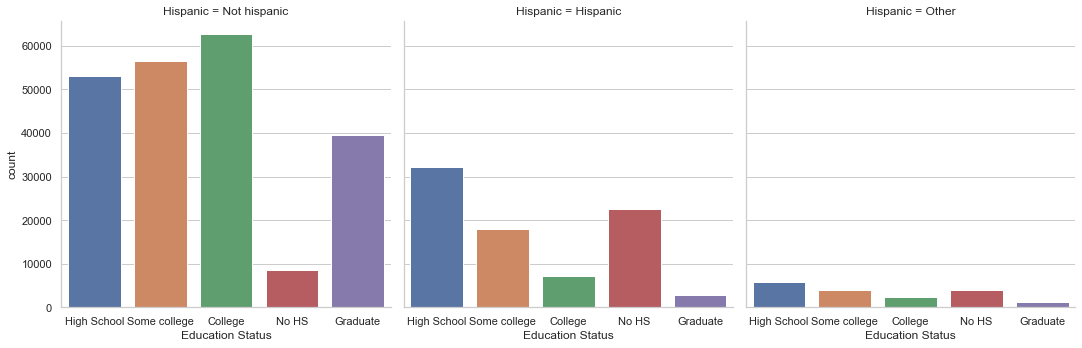

In [233]:
#pd.pivot_table(data=education, index=['Race', 'Education Status'], values=['Personal Pre-Tax Income'], aggfunc=np.mean)

plt.figure(figsize=(10, 15));
ax = sns.catplot(x='Education Status', col='Hispanic', 
            data=education, kind='count', col_wrap=3, orient="h");

## D) Indicators of poverty

What are the indicators of poverty? What relationship does poverty have with the other features (columns) in our dataset?

### Employment Status

In [270]:
poverty_seven = pd.read_csv('poverty_seven.csv')
poverty_seventeen = pd.read_csv('poverty_seventeen.csv')
poverty = pd.concat([poverty_seven, poverty_seventeen])

In [271]:
poverty.head(2)

,Year,Household Weight,State,County,City,Ownership Status,Household Income,Foodstamp Recipient,Age,Race,...,Part of Labor Force,Occupation,Industry,Type of Worker,Employment Sector,Hours worked per week,Personal Pre-Tax Income,Pre-Tax Income,Pre-Tax Wages,Poverty Status
0,2007,246,California,"Los Angeles-Long Beach-Anaheim, CA",Not in identifiable city (or size group),Rented,50400,No,48,Asian/Pacific Islander,...,"Yes, in the labor force",Production,Manufacturing,Works for wages,private,50,25000,50400,25000,Non-Poverty
1,2007,78,California,"San Francisco-Oakland-Hayward, CA",Not in identifiable city (or size group),Rented,87000,No,33,African American,...,"Yes, in the labor force",Computer Operations,Finance and Insurance,Works for wages,private,40,42000,87000,42000,Non-Poverty
